## Network Inspectors

The ```network_inspectors()``` module allows you to inspect the LANs directly. We will be grateful if you report any strange behavior you might find.

In [1]:
# MODULE IMPORTS ----
import numpy as np
import hddm

### Direct access to batch predictions

You can use the ```hddm.network_inspectors.get_torch_mlp()``` function to access network predictions.

In [2]:
# Specify model
model = "angle"
lan_angle = hddm.network_inspectors.get_torch_mlp(model=model)

In [3]:
# Make some random parameter set
parameter_df = hddm.simulators.make_parameter_vectors_nn(
    model=model, param_dict=None, n_parameter_vectors=1
)

parameter_matrix = np.tile(np.squeeze(parameter_df.values), (200, 1))

# Initialize network input
network_input = np.zeros(
    (parameter_matrix.shape[0], parameter_matrix.shape[1] + 2)
)  # Note the + 2 on the right --> we append the parameter vectors with reaction times (+1 columns) and choices (+1 columns)

# Add reaction times
network_input[:, -2] = np.linspace(0, 3, parameter_matrix.shape[0])

# Add choices
network_input[:, -1] = np.repeat(np.random.choice([-1, 1]), parameter_matrix.shape[0])

# Note: The networks expects float32 inputs
network_input = network_input.astype(np.float32)

# Show example output
print("Some network outputs")
print(lan_angle(network_input)[:10])  # printing the first 10 outputs
print("Shape")
print(lan_angle(network_input).shape)  # original shape of output

Some network outputs
[[-6.5302606 ]
 [ 0.5264375 ]
 [ 0.410895  ]
 [-0.52280986]
 [-1.0521754 ]
 [-1.552991  ]
 [-2.0735168 ]
 [-2.6183672 ]
 [-3.2071779 ]
 [-3.878473  ]]
Shape
(200, 1)


### Plotting Utilities

HDDM provides two plotting function to investigate the network outputs directly. The ```kde_vs_lan_likelihoods()``` plot and the ```lan_manifold()``` plot. 

**NOTE**:
These utilities are designed for 2-choice models at the moment.  


#### `kde_vs_lan_likelihoods()`

In [4]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(
    model=model, param_dict=None, n_parameter_vectors=10
)

In [5]:
parameter_df

,v,a,z,t,theta
0,2.729321,1.184634,0.798893,0.186882,0.225510
1,0.550569,1.473085,0.389967,0.583149,0.317908
2,0.297733,1.241166,0.630780,1.617812,0.455768
3,-2.918573,0.972126,0.307551,1.496773,0.898875
4,0.666445,1.882498,0.530820,0.259892,1.028040
5,1.629646,0.507156,0.692670,0.529111,0.845566
6,-1.255036,1.741760,0.678846,1.849304,1.233386
7,0.891731,0.795798,0.721093,1.705487,0.704186
8,-2.954760,1.518239,0.419388,0.623301,0.607989
9,0.360199,1.369782,0.629768,0.098295,0.497529


1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


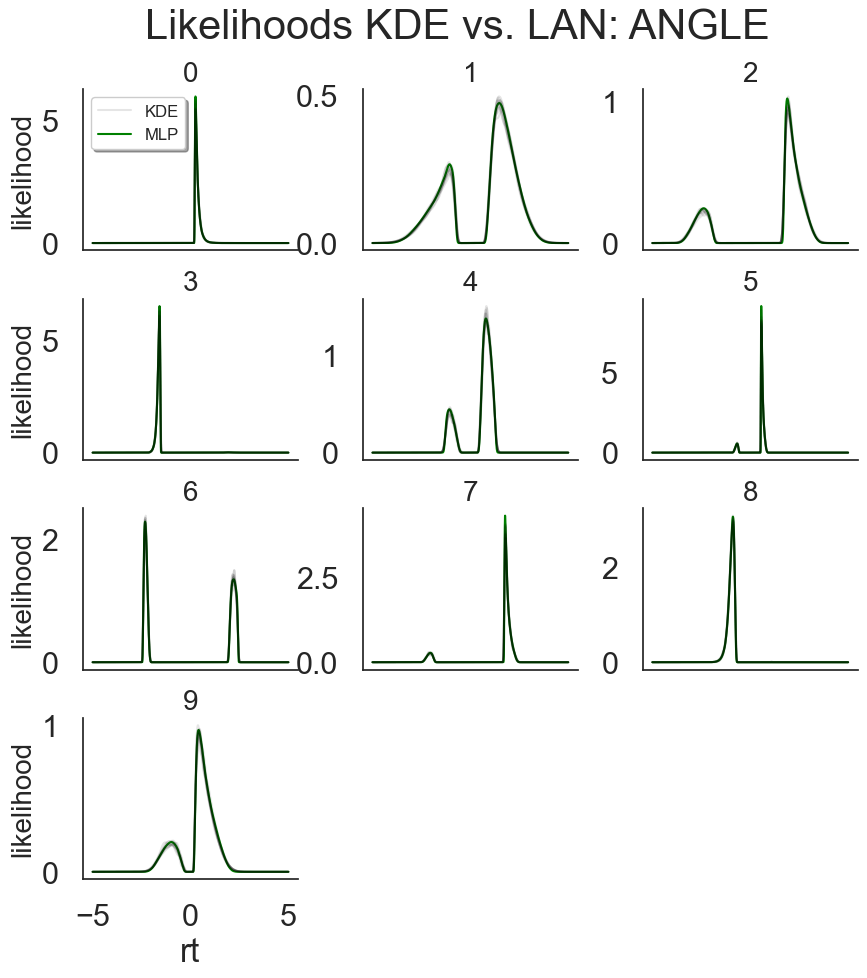

In [8]:
hddm.network_inspectors.kde_vs_lan_likelihoods(
    parameter_df=parameter_df, model=model, cols=3, n_samples=2000, n_reps=10, show=True
)

#### `lan_manifold()`

Lastly, you can use the ```lan_manifold()``` plot to investigate the LAN likelihoods over a range of parameters. 

The idea is to use a base parameter vector and vary one of the parameters in a prespecificed range. 

This plot can be informative if you would like to understand better how a parameter affects model behavior.

Using only the first row of the supplied parameter array !


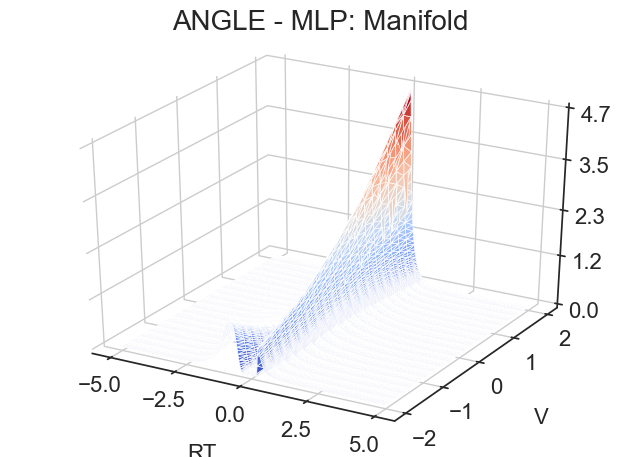

In [9]:
# Now plotting
hddm.network_inspectors.lan_manifold(
    parameter_df=parameter_df,
    vary_dict={"v": np.linspace(-2, 2, 20)},
    model=model,
    n_rt_steps=300,
    fig_scale=1.0,
    max_rt=5,
    save=True,
    show=True,
)